In [3]:
import torch
import torch.nn as nn

model = torch.hub.load_state_dict_from_url(
    "https://huggingface.co/obov/mnist/resolve/main/mnist_model.pth"
)
model


class Model(nn.Module):
    def __init__(self, input_dim, n_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, output_dim)
        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)  # 마지막 레이어에서는 활성화 함수 필요 없음
        return x


# 모델 초기화
model = Model(28 * 28 * 1, 1024, 10)  # MNIST의 경우 output_dim은 10 (0~9까지의 숫자)

# Hugging Face에서 가중치 다운로드 및 모델에 로드
state_dict = torch.hub.load_state_dict_from_url(
    "https://huggingface.co/obov/mnist/resolve/main/mnist_model.pth"
)

model.load_state_dict(state_dict)

model.eval()

print(model)

Model(
  (layer1): Linear(in_features=784, out_features=1024, bias=True)
  (layer2): Linear(in_features=1024, out_features=1024, bias=True)
  (layer3): Linear(in_features=1024, out_features=10, bias=True)
  (act): ReLU()
)


In [14]:
sample_input = torch.randn(1, 28 * 28)
print(sample_input.shape)
output = model(sample_input)
output

torch.Size([1, 784])


tensor([[ 1.6988, -2.0632, -0.8219,  0.5610, -1.0441,  1.8389, -1.7066, -0.2108,
          1.0381,  0.5772]], grad_fn=<AddmmBackward0>)

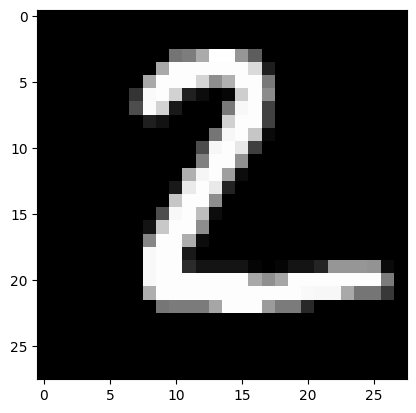

In [24]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.ToTensor()
test_set = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
test_set
test_set[0][0]
from matplotlib import pyplot as plt

plt.imshow(test_set[0][0][0], cmap="gray")

In [18]:
first = test_set[0][0][0].view(1, 28 * 28)
model(first)

tensor([[ 0.4451, -4.4537, -0.8104,  1.8564, -1.7567, -0.5978, -5.9950,  8.5856,
         -0.8553,  3.9663]], grad_fn=<AddmmBackward0>)

AxesImage(shape=(28, 28))
Predicted class: 1


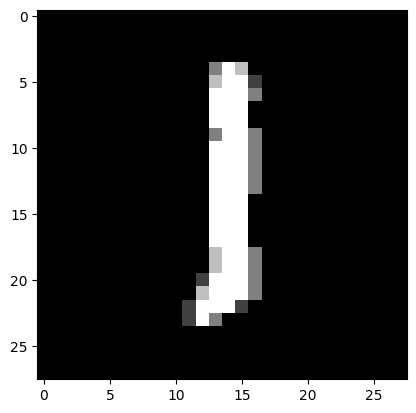

In [31]:
import torch.nn.functional as F


def pred(index):
    print(plt.imshow(test_set[index][0][0], cmap="gray"))

    return model(test_set[index][0][0].view(1, 28 * 28))


prediction = pred(14)

probabilities = F.softmax(prediction, dim=1)
predicted_class = torch.argmax(probabilities, dim=1)
print(f"Predicted class: {predicted_class.item()}")